In [1]:
!pip install panel nbformat


In [2]:
!pip install cdlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.5 MB/s eta 0:00:00


In [3]:
import networkx as nx
import random
import gzip
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
from cdlib import algorithms, viz
from collections import Counter
import pandas as pd
from collections import defaultdict

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'leidenalg', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


In [4]:
#empty graph object
G = nx.Graph()
#empty dictionary where values are automatically initialized to empty lists -- will have keys as comm ids and values as list of nodes in community
communities = defaultdict(list)

#the following code block reads the dataset file and stores each community id with the list of nodes in the communities dictionary
with gzip.open('/content/com-amazon.top5000.cmty.txt.gz', 'rt') as f:
    #this integer value is the current community id key that nodes in the dataset belong to
    community_id = 0
    #each line in the dataset is read in, and the current node value is extracted
    #those node values are added to the current dictionary value in the communities dictionary
    for line in f:
        #nodes is a list of strings of node ids -- the line is read in and split up by space
        nodes = line.strip().split('\t')
        #all the strings are converted to ints -- nodes is now a list of integers
        nodes = [int(node) for node in nodes]

        #this for loop iterates through each pair of nodes and adds an edge
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                G.add_edge(nodes[i], nodes[j])

        #this for loop adds each node in the community to the current community id
        for node in nodes:
            #community attribute for the node is assigned to the community id
            G.nodes[node]['community'] = community_id
            #in the communities dictionary, the node is added to the list of nodes contained in the current community
            communities[community_id].append(node)
        #after all nodes in the community have been added, the community_id is iterated to begin adding the next community
        community_id += 1

In [5]:
#random seed is set to generate the same randomized sample
random.seed(42)
#sampled edges is a list of 10000 edges (represented as tuples) which are randomly selected from the graph's edge
sampled_edges = random.sample(G.edges(), 10000)

#a new empty graph object
G_sample = nx.Graph()
#all the edges from the random sample are added to the sample graph object
G_sample.add_edges_from(sampled_edges)

#copy the community label from the original node to the sampled nodes
for node in G_sample.nodes():
    G_sample.nodes[node]['community'] = G.nodes[node]['community']

In [6]:
#example of one community
print(f"Community 0 example: {communities[0]}")

Community 0 example: [164985, 225214, 232761]


In [7]:
#number of nodes in the subgraph
print(f"Number of Nodes: {G_sample.number_of_nodes()}")

Number of Nodes: 8189


In [8]:
#number of edges in the subgraph
print(f"Number of Edges: {G_sample.number_of_edges()}")

Number of Edges: 10000


In [9]:
#number of connected components in the subgraph
print(f"Number of Connected Components: {nx.number_connected_components(G_sample)}")

Number of Connected Components: 1626


In [10]:
#creating a spring layout
pos=nx.spring_layout(G_sample)

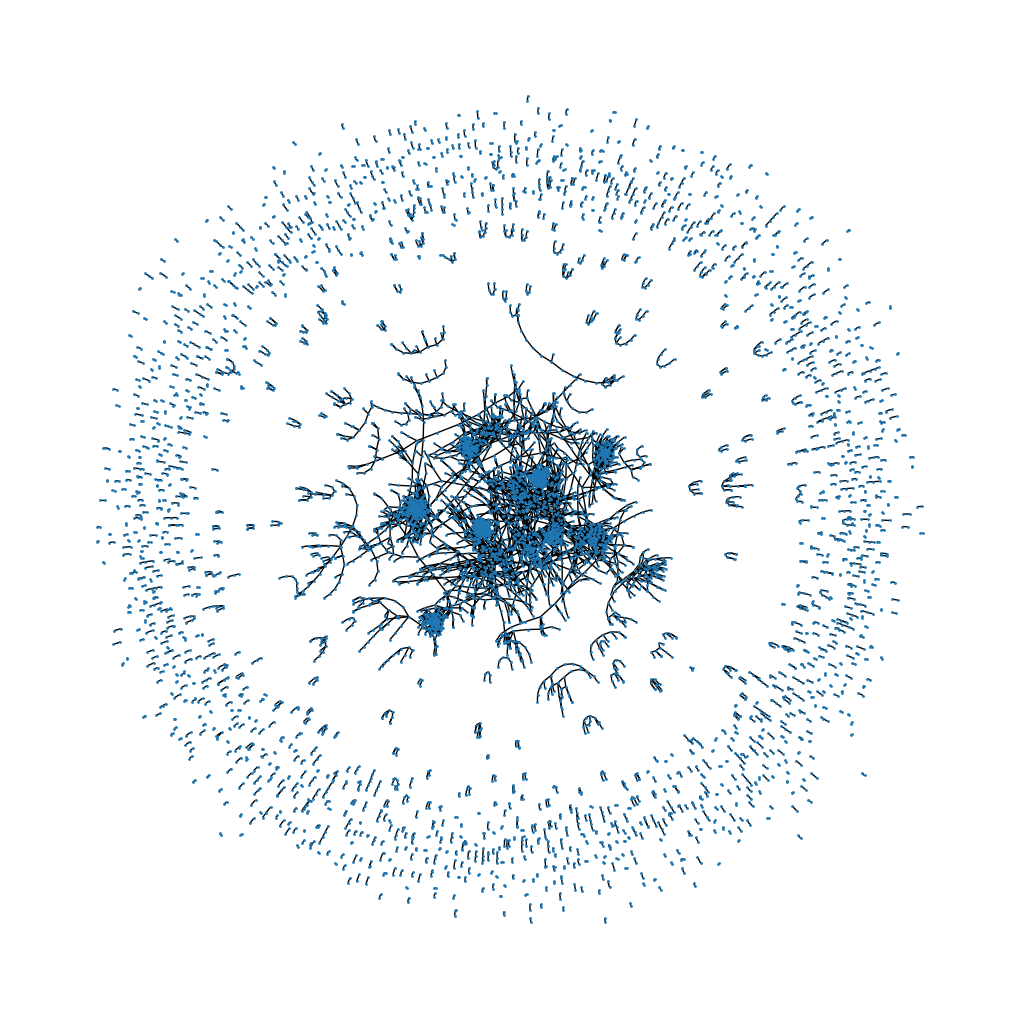

In [11]:
import matplotlib.pyplot as plt

#drawing the subgraph with the spring layout and point size of 1
plt.figure(figsize=(10, 10))
nx.draw(G_sample, pos=pos, node_size=1)
plt.show()

In [12]:
#since the graph is disconnected, we computed the diameters for each connected component and displayed the largest diameter value
#a list of connected components where each component is represented by the set of nodes contained within it
components = list(nx.connected_components(G_sample))
#diameters is an empty list which will hold the diameter value for each component
diameters = []
#iterates through each component, computes the diameter of the component, and adds that value to the diameters
for c in components:
  #generates a temporary subgraph of the component
  subgraph = G_sample.subgraph(c)
  #computes the diameter of the component, and adds that value to the diameters list
  diameters.append(nx.diameter(subgraph))
#the largest diameter from all components is displayed
print(f"Largest Diameter Across All Connected Components: {max(diameters)}")

Largest Diameter Across All Connected Components: 17


In [13]:
#dictionary with node ids as keys and clustering coefficient as values
clustering_coeffs = nx.clustering(G_sample)

#list of 5 tuples which represent nodes with top 5 highest coefficients
sorted_coeffs = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)

#the top 5 clustering coefficient nodes and their coefficients are displayed
print("The following nodes are the top 5 nodes with highest clustering coefficients: ")
sorted_coeffs[:5]

The following nodes are the top 5 nodes with highest clustering coefficients: 


[(137824, 1.0), (340592, 1.0), (345602, 1.0), (262203, 1.0), (108134, 1.0)]

In [14]:
#finding the top 5 nodes with highest betweenness centralities
print("top 5 nodes for betweenness centrality")

# dictionary of nodes containing the betweenness centrality for all nodes -- key: node id, value: betweenness
betweenness_centrality = nx.betweenness_centrality(G_sample)

#a list containing the top 5 nodes with highest betweenness centralities
#retrieved by sorting the betweenness centralities in descending order and extracting the first five node, value pairs
top_5_between = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:5]

#displaying the betweenness centralities (top 5)
top_5_between

top 5 nodes for betweenness centrality


[(418859, 0.00027960309381922497),
 (214971, 0.00014704697816300964),
 (490624, 0.0001372679941648715),
 (276303, 0.00012512287552268031),
 (120216, 7.270377101595875e-05)]

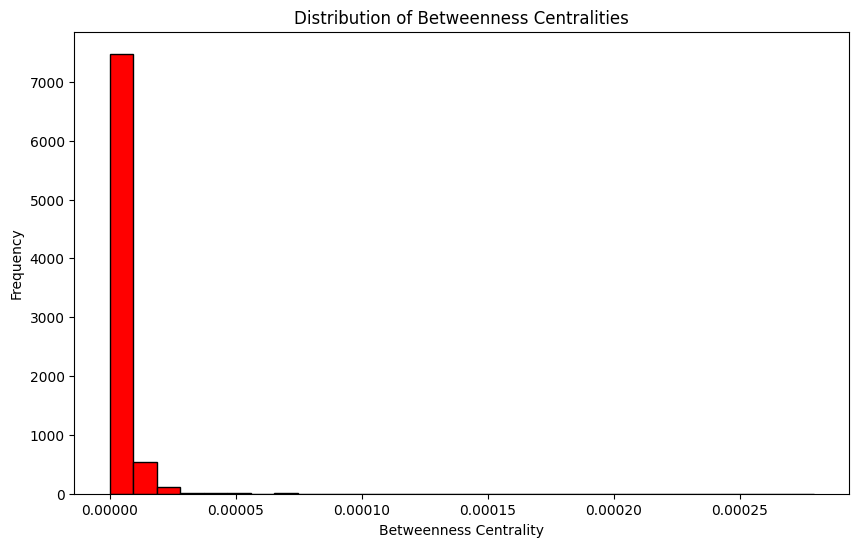

In [15]:
#plotting distributions of betweenness centralities by putting all the betweenness values in a matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=30, edgecolor='black', color = 'red')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centralities')
plt.show()

In [16]:
#finding the top 5 nodes with highest degree centralities
print("top 5 nodes for degree centrality")

#dictionary of degree centralities for all nodes -- key, node id; value, degree centrality
degree_centrality = nx.degree_centrality(G_sample)

#list containing tuples with the top 5 nodes and their degree centralities
#retrieving the top 5 degree centralities by sorting the degrees in descending order
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

#displaying the degree centralities (top 5)
top_5_degree

top 5 nodes for degree centrality


[(59613, 0.002320468978993649),
 (236947, 0.002320468978993649),
 (141618, 0.0021983390327308255),
 (59532, 0.0021983390327308255),
 (451488, 0.002076209086468002)]

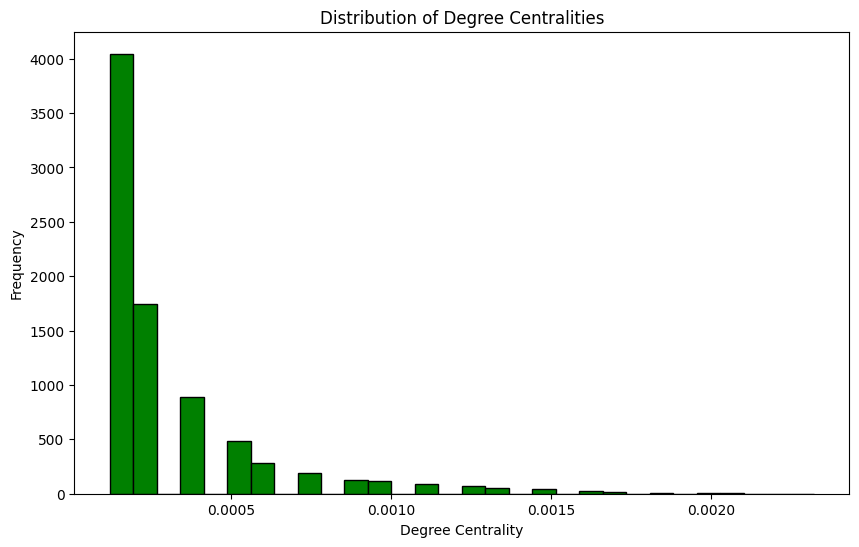

In [17]:
#plotting distributions of degree centralities by putting all the degree centrality values in a matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=30, edgecolor='black', color='green')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centralities')
plt.show()

In [18]:
#finding the top 5 nodes with highest closeness centralities
print("top 5 nodes for closeness centrality")

#dictionary of closeness centralities for all nodes -- key, node id; value, closeness centrality
closeness_centrality = nx.closeness_centrality(G_sample)

#list containing tuples with the top 5 nodes and their closeness centralities
#retrieving the top 5 closeness centralities by sorting the closeness in descending order
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

#displaying top 5 closeness centralities
top_5_closeness

top 5 nodes for closeness centrality


[(236947, 0.016355736236849404),
 (59613, 0.016238770304285523),
 (141618, 0.015934886883386613),
 (59532, 0.015768898478351334),
 (80756, 0.015714334815796486)]

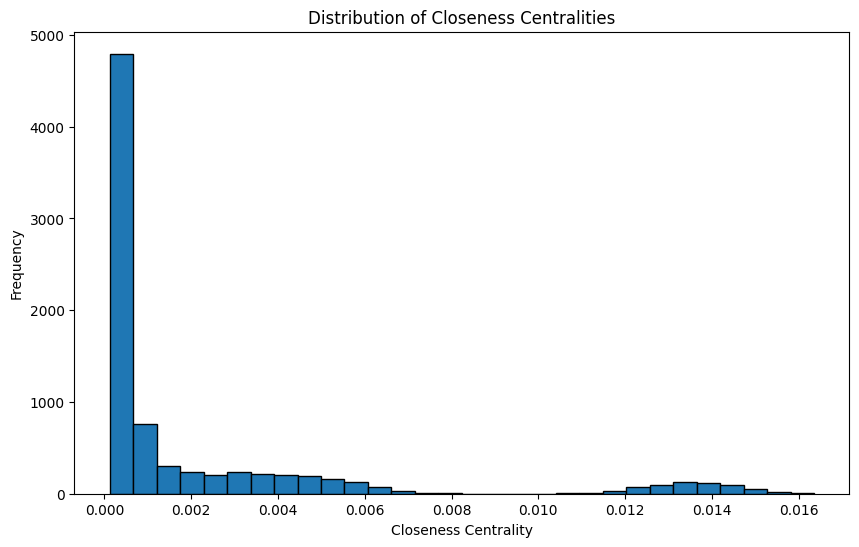

In [19]:
#plotting distributions of closeness centralities by putting all closeness centrality values on a matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=30, edgecolor='black')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness Centralities')
plt.show()

In [20]:
#partition is a dictionary containing node ids as keys and the community they belong to as values
#this is the best louvain partition on this graph
partition = community_louvain.best_partition(G_sample)

#a counter object where each key is a community id and the value is the size of the community (number of nodes)
community_counts = Counter(partition.values())

#list which contains the top 5 community ids and their sizes
top_5_communities = community_counts.most_common(5)

#prints number of communities in this partition
print(f"total num of communities: {len(community_counts)}\n")

#printing community id and sizes from the top 5 communities
print("top 5 community sizes:")
#iterates through the top 5 communities and prints each community is along with its size
for community_id, size in top_5_communities:
    print(f"  - Community ID: {community_id}, Size: {size} nodes")

total num of communities: 1627

top 5 community sizes:
  - Community ID: 16, Size: 335 nodes
  - Community ID: 2, Size: 312 nodes
  - Community ID: 31, Size: 170 nodes
  - Community ID: 0, Size: 157 nodes
  - Community ID: 48, Size: 143 nodes


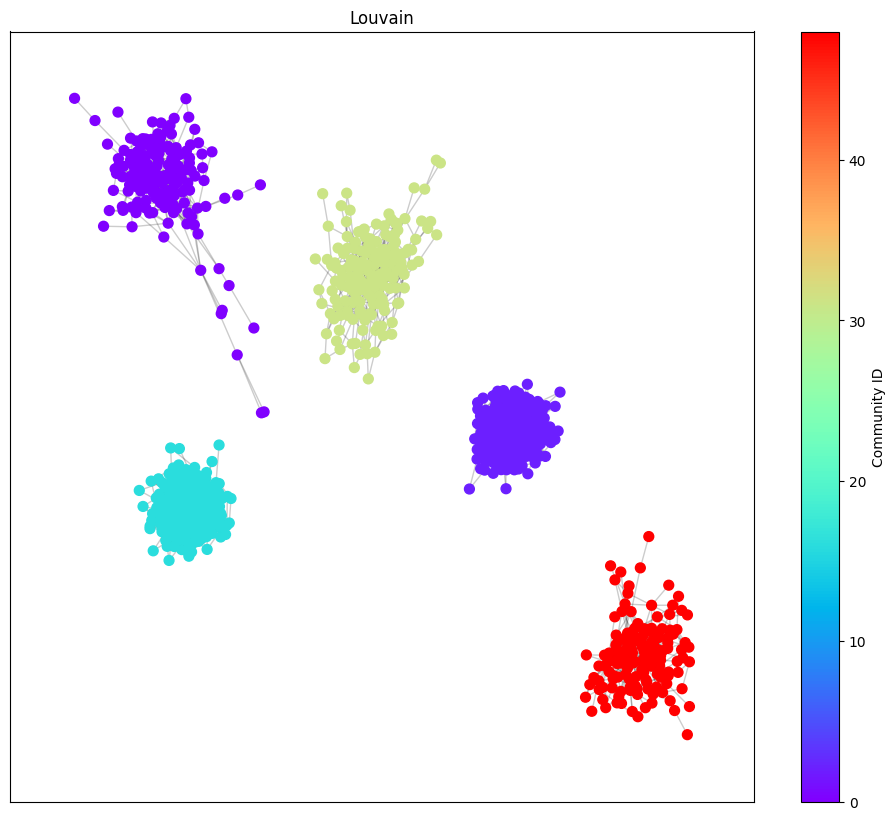

In [21]:
#list containing ids of top 5 louvain communities
top_5_community_ids = [community_id for community_id, _ in top_5_communities]

#list containing all the nodes which belong to one of the top 5 communities
top_5_nodes = [node for node in G_sample.nodes if partition[node] in top_5_community_ids]

#subgraph object generated using the nodes in the top 5 communities
G_top5 = G_sample.subgraph(top_5_nodes)

#list of node ids -- this is used to assign colors to nodes in different communities
node_colors = [partition[node] for node in G_top5.nodes]

#plotting the top 5 communities in different colors
plt.figure(figsize=(12, 10))
#draw the communities in spring layout
pos = nx.spring_layout(G_top5, seed=42)
#collection object which contains the drawn nodes -- with their assigned color and position in the spring layout
nodes = nx.draw_networkx_nodes(G_top5, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=50)
#draw the edges on the subgraph
nx.draw_networkx_edges(G_top5, pos, alpha=0.2)

#show the top 5 louvain communities
plt.title("Louvain")
plt.colorbar(nodes, label="Community ID")
plt.show()


In [22]:
#calculating the average size of the communities in the best split using Louvain algorithm

#float variable containing average louvain community size
#divide total number of nodes by the number of communities represented in the best split
average_community_size_louvain = G_sample.number_of_nodes() /len(community_counts)

#displaying the average size of the communities in the best split using Louvain algorithm
print(f"Average Community Size Using Louvain Algorithm: {average_community_size_louvain}")

Average Community Size Using Louvain Algorithm: 5.033189920098341


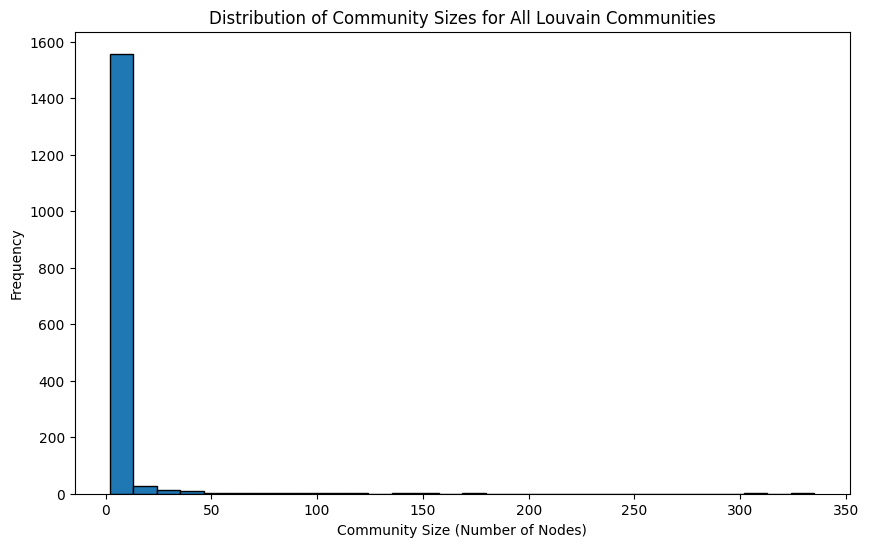

In [23]:
#plotting distribution of community sizes for louvain algorithm using a matplotlib histogram
plt.figure(figsize=(10, 6))
plt.hist(community_counts.values(), bins=30, edgecolor='black')
plt.xlabel('Community Size (Number of Nodes)')
plt.ylabel('Frequency')
plt.title('Distribution of Community Sizes for All Louvain Communities')
plt.show()

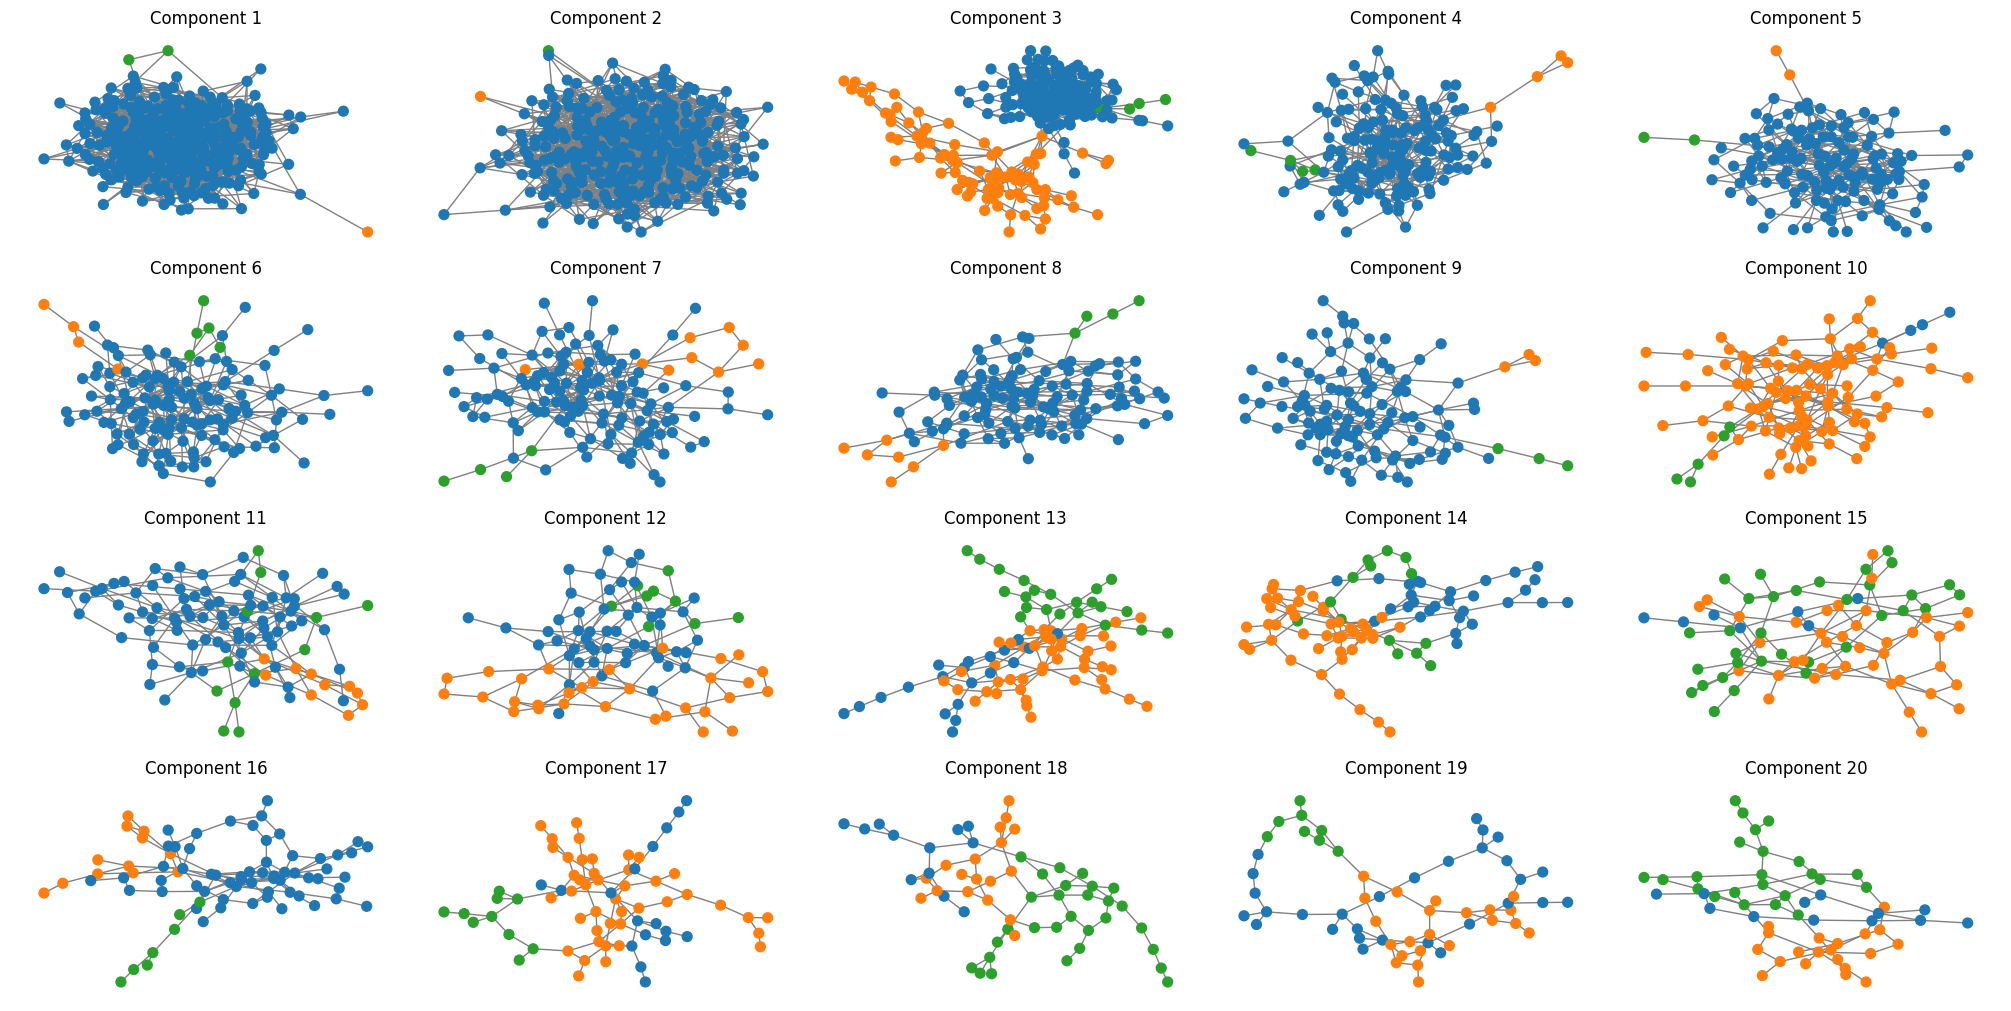

In [24]:
#running Girvan-Newman on the top 20 largest connected components in the graph
import networkx.algorithms.community as nx_comm
import itertools

#node colors for different communities -- takes all the communities and the graph
#a unique color string id is assigned to each community id - stored in a dictionary
#the returned list contains the specified node color id for each node in the set of nodes
def color_communities(communities, graph):
    color_map = {}
    for i, community in enumerate(communities):
        color = f'C{i}'
        for node in community:
            color_map[node] = color
    return [color_map.get(node, "black") for node in graph.nodes]

#plotting on a 4 row, 5 column layout for the top 20 connected components
fig, axs = plt.subplots(4, 5, figsize=(20, 10), constrained_layout=True)

#a list of 20 components where each component is represented by a set of nodes -- sorted in descending order by size
top_20_components = sorted(nx.connected_components(G_sample), key=len, reverse=True)[:20]

#the component communities are stored in dictionary -- key, comm id, values, nodes
component_communities = {}
#empty list which will store community sizes
all_community_sizes = []

#get the nodes in the top 20 components and split to slice 1 for girvan-newman
#iterate through the top 20 communities with their community id and component nodes
for i, component_nodes in enumerate(top_20_components):
  #generate a subgraph from the component nodes
  subgraph = G_sample.subgraph(component_nodes)

  #generator instance that can compute girvan-newman split on the subgraph
  communities_gn = nx_comm.girvan_newman(subgraph)

  #a tuple of communities which contains the set of nodes in each community -- first girvan-newman split
  top_community_split = next(itertools.islice(communities_gn, 1, 2))

  #a list containing community sizes for each community
  community_sizes = [len(community) for community in top_community_split]
  #all the community sizes are added to the community size list
  all_community_sizes.extend(community_sizes)

  #for the communities dictionary, label each community with the id and then add the community divisions for that component as the value
  component_communities[f"Component {i+1}"] = top_community_split
  #list of community color ids -- apply the color mapping function to color each node
  color_map = color_communities(top_community_split, subgraph)

  #draw all 20 components on the grid with the correct component title
  nx.draw(
      subgraph,
      ax=axs[i // 5, i % 5],
      node_color=color_map,
      with_labels=False,
      node_size=50,
      edge_color="gray"
  )
  axs[i // 5, i % 5].set_title(f"Component {i+1}")

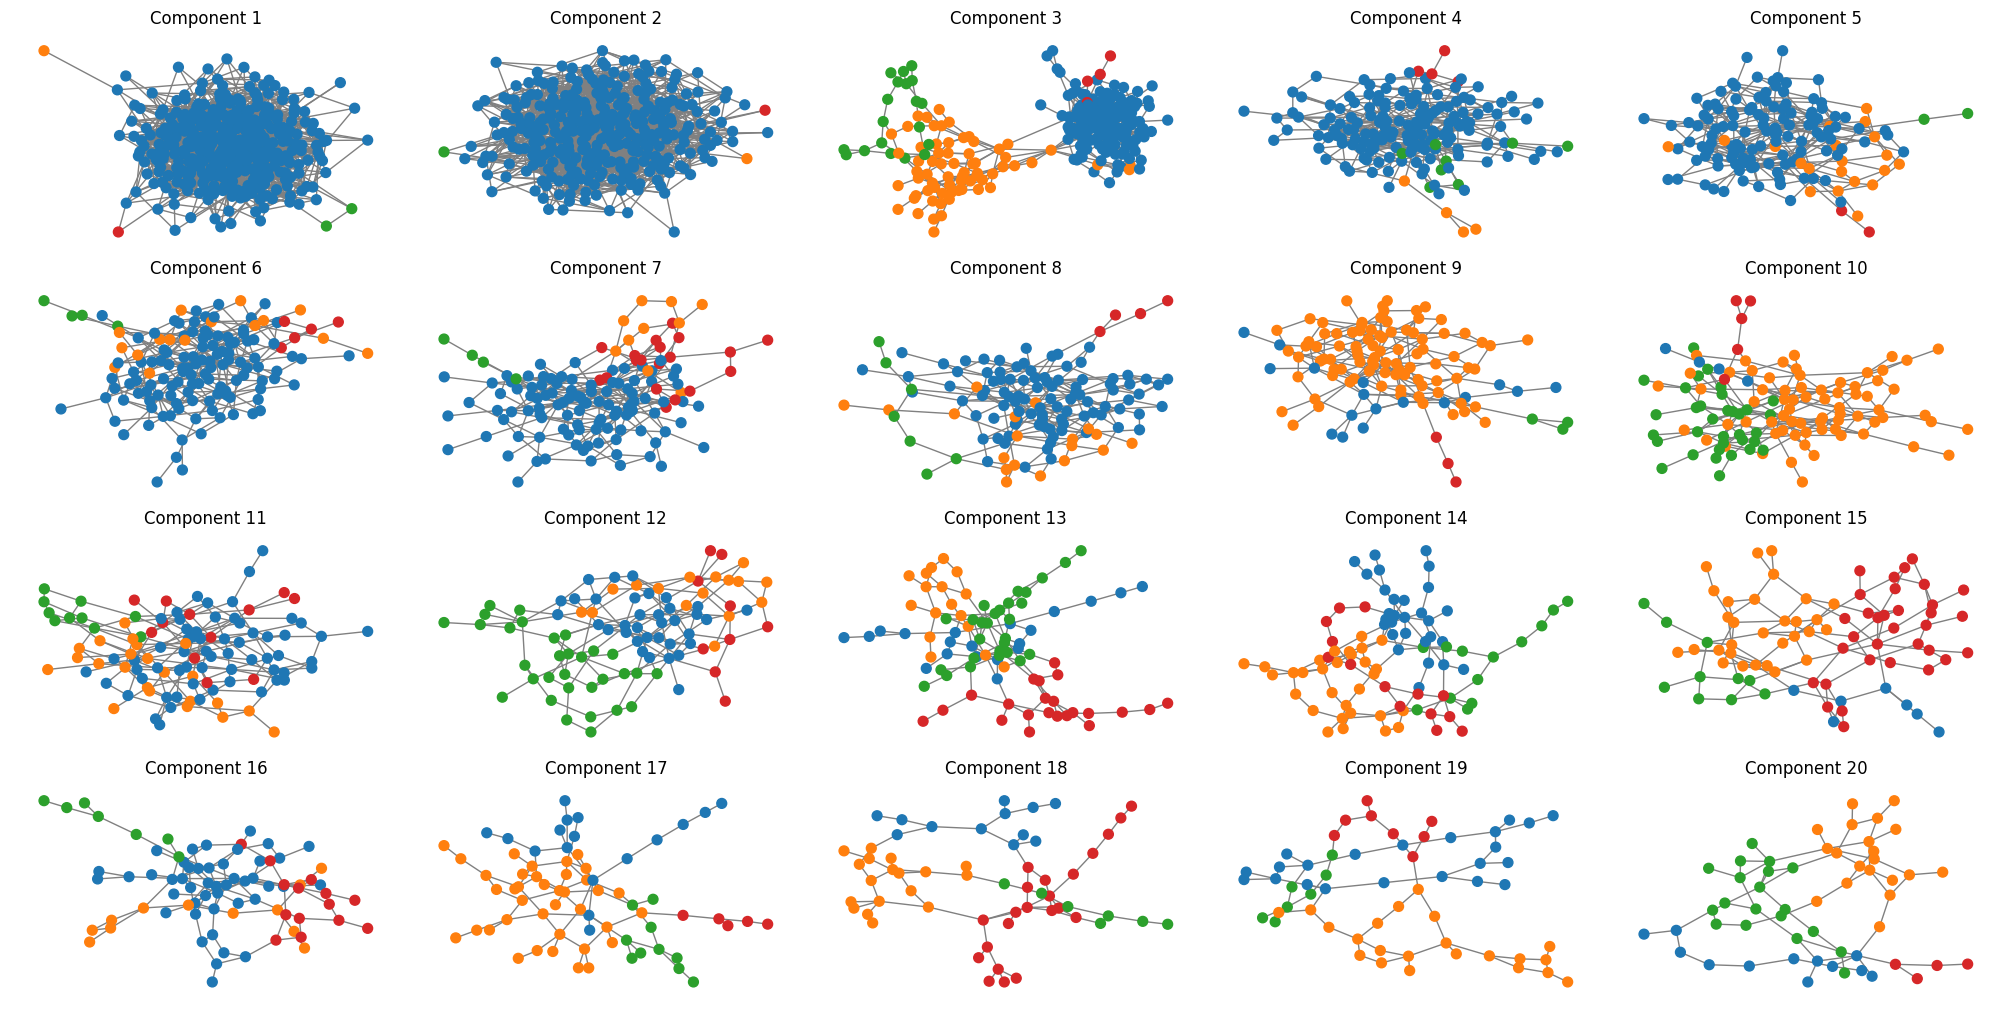

In [25]:
#creating a new plot for the second girvan-newman partition
fig, axs = plt.subplots(4, 5, figsize=(20, 10), constrained_layout=True)
#dictionary to store new community divisions for top 20 components
component_communities_two = {}
#list to store community sizes for partition 2
all_community_sizes_two = []

#get the nodes in the top 20 components and split to slice 2 for girvan-newman
#iterate through the top 20 communities with their community id and component nodes
for i, component_nodes in enumerate(top_20_components):
  #new graph object storing a subgraph made up of the nodes in each community
  subgraph = G_sample.subgraph(component_nodes)

  #generator instance that can compute girvan-newman split on the subgraph
  communities_gn = nx_comm.girvan_newman(subgraph)

  #a tuple of communities which contains the set of nodes in each community -- second girvan-newman split
  top_community_split = next(itertools.islice(communities_gn, 2, 3))

  #a list containing community sizes for each community
  community_sizes = [len(community) for community in top_community_split]
  #all the community sizes are added to the community size list
  all_community_sizes_two.extend(community_sizes)

  #for the communities dictionary, label each community with the id and then add the community divisions for that component as the value
  component_communities_two[f"Component_{i+1}"] = top_community_split
  #apply the color mapping function to color each node
  color_map = color_communities(top_community_split, subgraph)

  #draw all 20 components on the grid with the correct component title
  nx.draw(
      subgraph,
      ax=axs[i // 5, i % 5],
      node_color=color_map,
      with_labels=False,
      node_size=50,
      edge_color="gray"
  )
  axs[i // 5, i % 5].set_title(f"Component {i+1}")

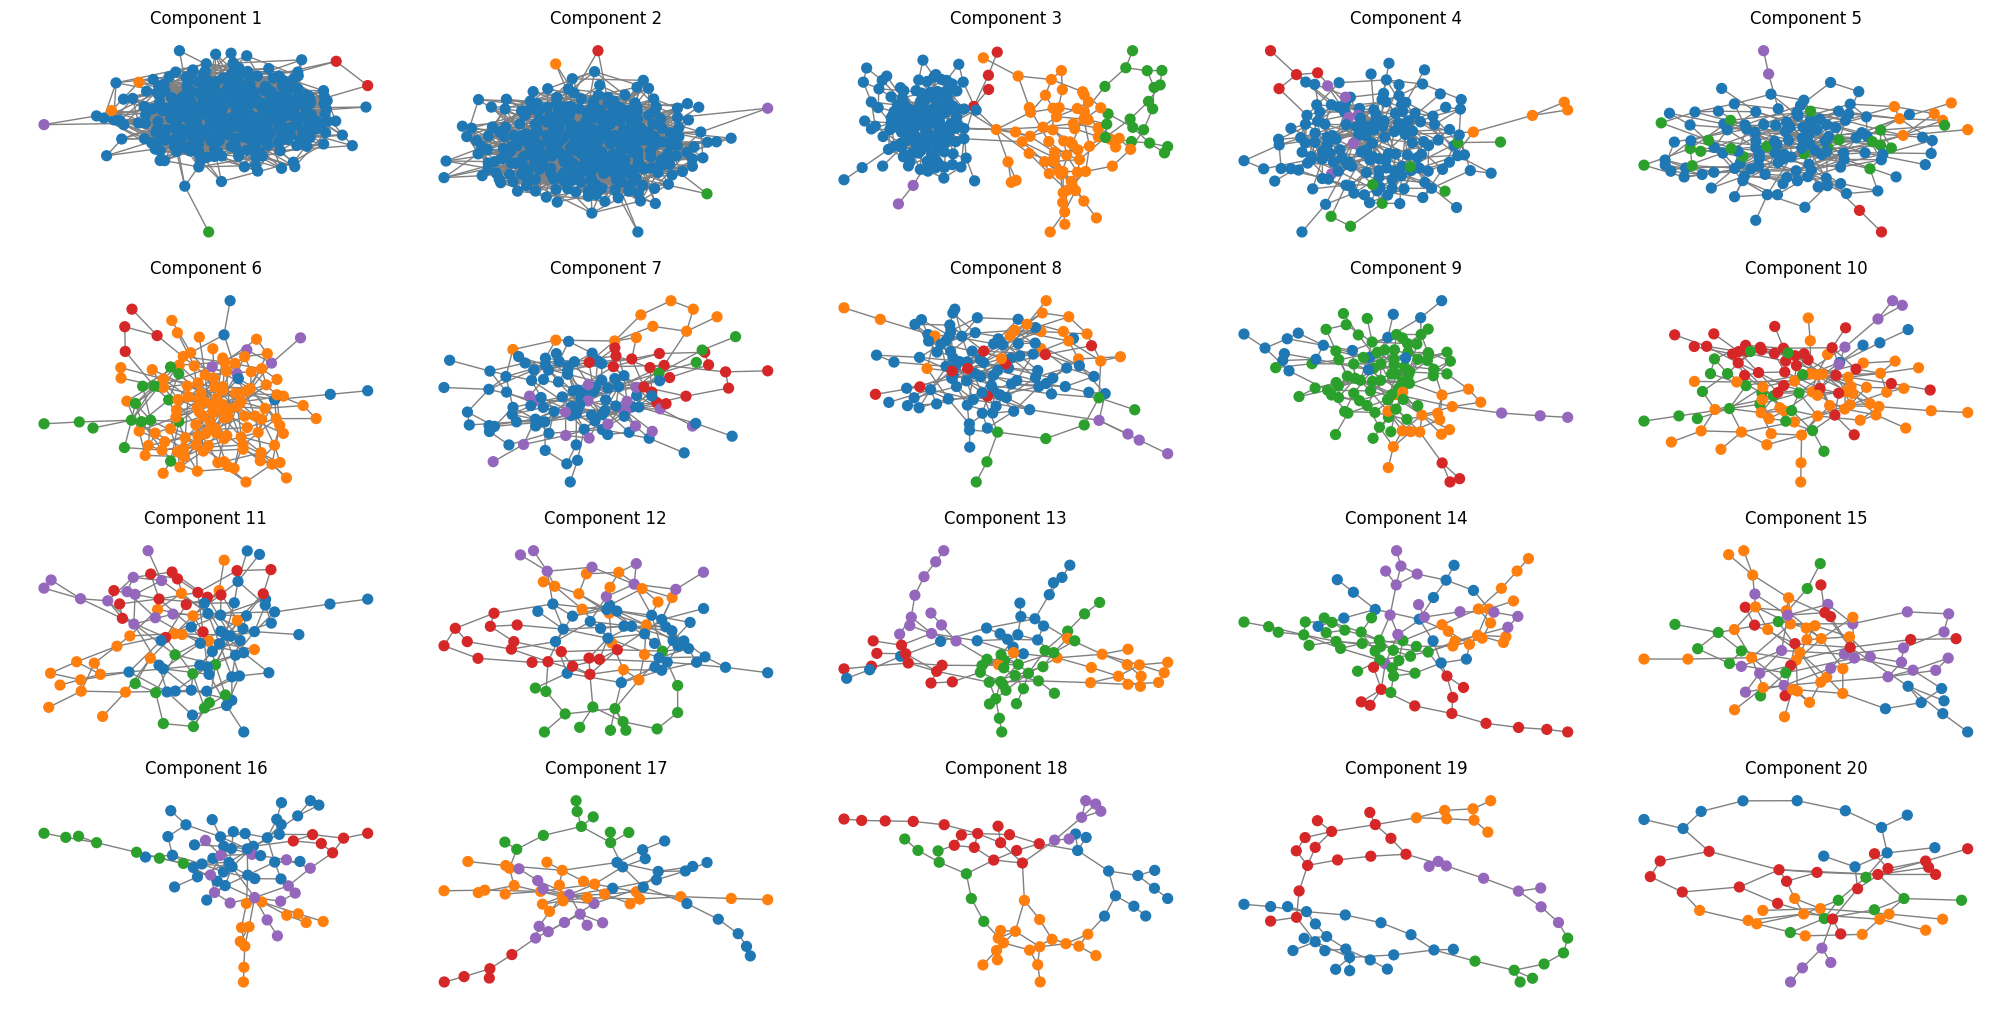

In [26]:
#creating a new plot for the second girvan-newman partition
fig, axs = plt.subplots(4, 5, figsize=(20, 10), constrained_layout=True)
#dictionary to store new community divisions for top 20 components
component_communities_three = {}
#list to store community sizes for partition 3
all_community_sizes_three = []

#get the nodes in the top 20 components and split to slice 3 for girvan-newman
#iterate through the top 20 communities with their community id and component nodes
for i, component_nodes in enumerate(top_20_components):
  #new graph object storing a subgraph made up of the nodes in each community
  subgraph = G_sample.subgraph(component_nodes)

  #generator instance that can compute girvan-newman split on the subgraph
  communities_gn = nx_comm.girvan_newman(subgraph)

  #a tuple of communities which contains the set of nodes in each community -- third girvan-newman split
  top_community_split = next(itertools.islice(communities_gn, 3, 4))

  #a list containing community sizes for each community
  community_sizes = [len(community) for community in top_community_split]
  #all the community sizes are added to the community size list
  all_community_sizes_three.extend(community_sizes)

  #for the communities dictionary, label each community with the id and then add the community divisions for that component as the value
  component_communities_three[f"Component_{i+1}"] = top_community_split
  #apply the color mapping function to color each node
  color_map = color_communities(top_community_split, subgraph)

  #draw all 20 components on the grid with the correct component title
  nx.draw(
      subgraph,
      ax=axs[i // 5, i % 5],
      node_color=color_map,
      with_labels=False,
      node_size=50,
      edge_color="gray"
  )
  axs[i // 5, i % 5].set_title(f"Component {i+1}")

In [27]:
#using the community sizes from split 1 to calculate the average community size on partition 1
#float value containing the average community size on partition 1
average_community_sizes_gn_1 = sum(all_community_sizes) / len(all_community_sizes)
#printing average community size on partition 1
print(f"Average Community Sizes in Girvan-Newman (Partition 1): {average_community_sizes_gn_1}")

Average Community Sizes in Girvan-Newman (Partition 1): 43.21666666666667


In [28]:
#using the community sizes from split 2 to calculate the average community size on partition 2
#float value containing the average community size on partition 2
average_community_sizes_gn_2 = sum(all_community_sizes_two) / len(all_community_sizes_two)
#printing average community size on partition 2
print(f"Average Community Sizes in Girvan-Newman (Partition 2): {average_community_sizes_gn_2}")

Average Community Sizes in Girvan-Newman (Partition 2): 32.4125


In [29]:
#using the community sizes from split 3 to calculate the average community size on partition 3
#float value containing the average community size on partition 3
average_community_sizes_gn_3 = sum(all_community_sizes_three) / len(all_community_sizes_three)
#printing average community size on partition 3
print(f"Average Number of Communities in Girvan-Newman (Partition 3): {average_community_sizes_gn_3}")

Average Number of Communities in Girvan-Newman (Partition 3): 25.93


In [30]:
import matplotlib as mpl

#list containing the lemon communities -- each community is represented by a frozenset of nodes
lemon_communities = list(nx.community.greedy_modularity_communities(G_sample))

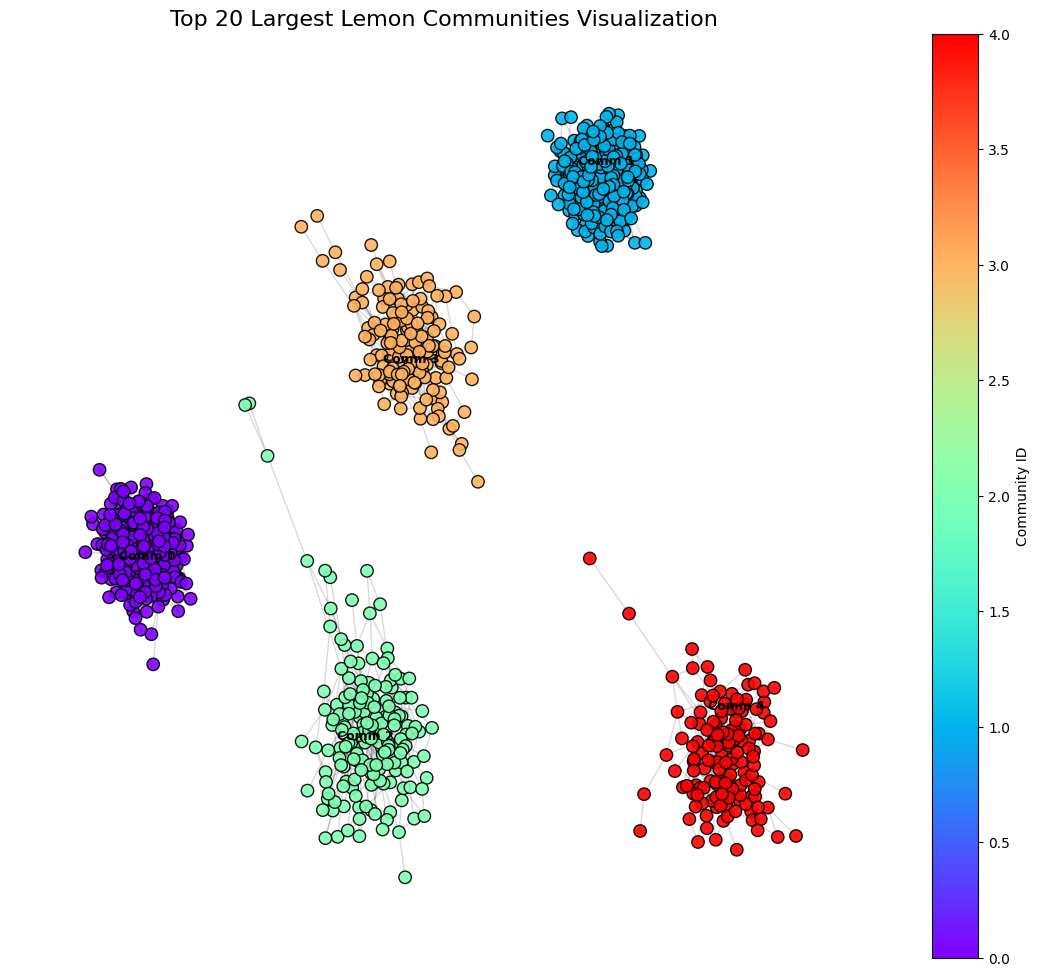

In [31]:
#dictionary to store node (key) and community id (value)
community_dict = {}
#going through all the lemon community ids and the list of nodes
for i, community in enumerate(lemon_communities):
    #iterating through each node and assigning the node's value in the dictionary to the community id
    for node in community:
        community_dict[node] = i

#list containing the community sizes for all the lemon communities
community_sizes = Counter(community_dict.values())
#list containing the top 5 community sizes
top_5_lemon_communities = community_sizes.most_common(5)

#list containing all the node ids for nodes in the top 5 communities
top_5_nodes = [node for node in G_sample.nodes if community_dict.get(node) in [comm[0] for comm in top_5_lemon_communities]]
#graph object representing the subgraph made up of the nodes from top 5 communities
G_top5 = G_sample.subgraph(top_5_nodes)

#a list of ids for each node which is used to assign the colors for each community
node_colors = [community_dict[node] for node in G_top5.nodes]

#find central nodes for labeling
central_nodes = {}
for comm_id, _ in top_5_lemon_communities:
    community_nodes = [node for node in top_5_nodes if community_dict[node] == comm_id]
    # find central node based on degree centrality
    degree_centrality = nx.degree_centrality(G_top5)
    #the central node has the highest degree centrality -- extract using the max function
    central_node = max(community_nodes, key=lambda node: degree_centrality[node])
    #set the central node to have the community id
    central_nodes[central_node] = comm_id

#create a matplotlib figure and a spring layout for the top 5 communities
fig, ax = plt.subplots(figsize=(14, 12))
#spring layout for the top 5 lemon communities
pos = nx.spring_layout(G_top5, seed=42)

#draw nodes with community colors
nx.draw_networkx_nodes(G_top5, pos, ax=ax, node_color=node_colors, cmap=plt.cm.rainbow, node_size=80, alpha=0.9, edgecolors="k")
#draw edges between the nodes in the top 5 subgraph
nx.draw_networkx_edges(G_top5, pos, ax=ax, alpha=0.15)

#a dictionary that takes each central node and puts the community label on it
labels = {node: f"Comm {comm_id}" for node, comm_id in central_nodes.items()}
#draws the communities with the labels on the central node
nx.draw_networkx_labels(G_top5, pos, labels, font_size=9, font_color="black", font_weight="bold", verticalalignment="bottom", ax=ax)

#add a color bar on the side of the graph
sm = mpl.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=mpl.colors.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Community ID")

#set the lemon community font title, with no axis label
ax.set_title("Top 20 Largest Lemon Communities Visualization", fontsize=16)
plt.axis("off")
plt.show()


In [32]:
#iterate through the top 5 communities and calculate the density of the components
for comm_id, _ in top_5_lemon_communities:
    #list of nodes in the community
    community_nodes = [node for node in G_sample.nodes if community_dict[node] == comm_id]
    #subgraph made from nodes in the current community
    subgraph = G_sample.subgraph(community_nodes)
    #float value representing density of the subgraph
    density = nx.density(subgraph)
    #print each community's id and density
    print(f"Community ID: {comm_id}, Density: {density:.4f}")

Community ID: 0, Density: 0.0261
Community ID: 1, Density: 0.0263
Community ID: 2, Density: 0.0235
Community ID: 3, Density: 0.0277
Community ID: 4, Density: 0.0285


In [33]:
#iterate through the top 5 communities and find the central node -- which has the highest degree centrality
for comm_id, _ in top_5_lemon_communities:
    #list of nodes in the community
    community_nodes = [node for node in G_sample.nodes if community_dict[node] == comm_id]
    #id of the node with the highest degree centrality -- the central node
    central_node = max(community_nodes, key=lambda node: nx.degree_centrality(G_sample)[node])
    #print the community id and the id of the most central node
    print(f"Community ID: {comm_id}, Central Node: {central_node}")

Community ID: 0, Central Node: 59613
Community ID: 1, Central Node: 146527
Community ID: 2, Central Node: 426084
Community ID: 3, Central Node: 490624
Community ID: 4, Central Node: 537524


In [34]:
#list containing the size of each community in lemon's communities
community_sizes = [len(community) for community in lemon_communities]
#compute the average community size in lemon by taking number of nodes and dividing by the number of communities
#float value containing the average community size in lemon
average_community_size_lemon = sum(community_sizes) / len(community_sizes)
#printing average lemon community size
print(f"Average Community Size (Lemon): {average_community_size_lemon}")

Average Community Size (Lemon): 5.033189920098341


In [35]:
from networkx.algorithms.community import k_clique_communities
#using the size of cliques as 2

#k is an integer value specifying the size of the cliques to find -- cliques here are pairs of nodes connected by an edge
k = 2
#a list of communities where each community is represented as a frozenset of nodes
communities = list(k_clique_communities(G_sample, k))
#a list of all the k=2 k-clique communities sorted in descending order by size of community
sorted_communities = sorted(communities, key=len, reverse=True)

#finding top 5 largest cliques from k-clique by extracting the top 5 nodes in the sorted list
top_5_communities = sorted_communities[:5]
#list containing the sizes of each of the top 5 communities in k-clique (k = 2)
community_sizes = [len(community) for community in top_5_communities]

#printing top 5 communities (k = 2)
for i, community in enumerate(top_5_communities):
    print(f"Community {i+1}: Size = {len(community)}, Nodes = {list(community)}")

Community 1: Size = 335, Nodes = [75780, 336905, 205838, 186386, 419862, 176159, 104481, 433190, 373799, 401449, 119854, 299055, 123953, 355378, 361524, 19509, 176184, 366654, 124992, 318538, 199759, 321619, 276567, 374874, 221281, 432229, 104553, 383087, 277617, 296069, 448649, 522378, 59532, 74895, 491667, 263317, 289953, 518306, 182435, 309411, 204966, 93356, 296111, 172218, 250046, 326849, 95427, 231620, 435398, 497867, 222414, 186575, 277713, 535762, 346322, 399572, 60627, 396502, 530647, 484561, 326874, 252125, 59613, 127199, 379102, 4328, 116969, 430314, 366824, 202986, 226541, 350442, 458993, 30962, 181492, 242933, 35067, 217346, 295177, 343306, 298254, 392463, 49424, 52500, 279830, 123159, 482584, 278, 21786, 271643, 127262, 52511, 191775, 423198, 197919, 370979, 476448, 471336, 151849, 460073, 190765, 511278, 149809, 45362, 141618, 92472, 84285, 198973, 141635, 384330, 258382, 335183, 443731, 371029, 451931, 108892, 14686, 204126, 314719, 272735, 216422, 340331, 64879, 273775

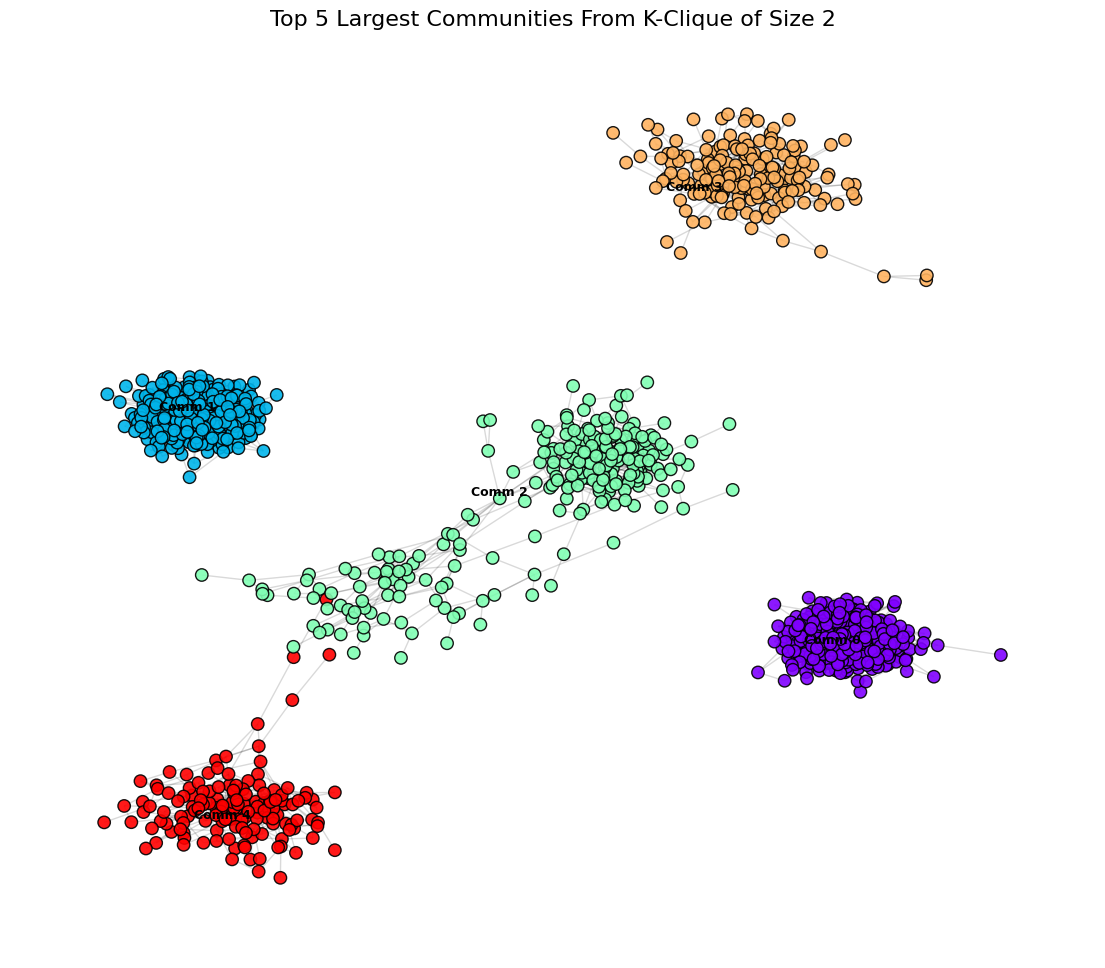

In [36]:
#iterating through the top 5 k-clique communities and labelling all the nodes with their community id

#dictionarity in which the key is the node id and the value is the community id
community_dict = {}
#the top_5_nodes list contains all the nodes in the top 5 communities
top_5_nodes = []
#for loop iterates through the top 5 communities
for i, community in enumerate(top_5_communities):
    #iterates through each node in the community
    for node in community:
        #the node's value is set to the community id in the community dictionary
        community_dict[node] = i
        #node id is added to the top 5 nodes list
        top_5_nodes.append(node)

#subgraph object which represents the top 5 k-clique (k = 2) communities
G_top5 = G_sample.subgraph(top_5_nodes)

#this list assigns community ids to respective nodes so that each community has a different color
node_colors = [community_dict[node] for node in G_top5.nodes]

#dictionary holding central node id (key) and the community it is central to (value)
central_nodes = {}
for comm_id in range(5):
    #list containing all the nodes in the current community
    community_nodes = [node for node in top_5_nodes if community_dict.get(node) == comm_id]
    #dictionary of nodes (keys) and the degree centralities for the nodes (values)
    degree_centrality = nx.degree_centrality(G_top5)
    #integer value representing the node id of the central node (highest degree centrality)
    central_node = max(community_nodes, key=lambda node: degree_centrality[node])
    #putting the community id label on the most central node
    central_nodes[central_node] = comm_id

#creating a new matplotlib figure and spring layout for the top 5 k-clique (k = 2) communities
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G_top5, seed=42)

#using the spring layout and the extracted nodes to generate the network x graph by drawing nodes with the node colors
nx.draw_networkx_nodes(G_top5, pos, ax=ax, node_color=node_colors, cmap=plt.cm.rainbow, node_size=80, alpha=0.9, edgecolors="k")
#drawing edges for nodes in the top 5 k-clique (k=2) communities
nx.draw_networkx_edges(G_top5, pos, ax=ax, alpha=0.15)

#dictionary with the central nodes as keys and the community id label as the values
labels = {node: f"Comm {comm_id}" for node, comm_id in central_nodes.items()}
#draw the labels onto the central nodes for each community
nx.draw_networkx_labels(G_top5, pos, labels, font_size=9, font_color="black", font_weight="bold", verticalalignment="bottom", ax=ax)

#setting the title to k-clique k = 2 and removing the axes
ax.set_title("Top 5 Largest Communities From K-Clique of Size 2", fontsize=16)
plt.axis("off")
plt.show()


In [37]:
#using the stored k-clique community sizes to compute the average community size
#float value containing the average community size for k-clique k = 2
average_community_size_k_clique_2 = sum(community_sizes) / len(community_sizes)
#printing average community size
print(f"Average Community Size (k-Clique, k={k}): {average_community_size_k_clique_2}")

Average Community Size (k-Clique, k=2): 239.4


In [38]:
#printing number of communities in the k-2 partition
print(f"Number of communities with k size of 2: {len(communities)}")

Number of communities with k size of 2: 1626


In [39]:
#using size of k-cliques as 3

#k is an integer value specifying the size of the cliques to find -- cliques here are complete graphs with 3 nodes
k = 3
#a list of communities where each community is represented as a frozenset of nodes
communities_two = list(k_clique_communities(G_sample, k))
#a list of all the k=2 k-clique communities sorted in descending order by size of community
sorted_communities_two = sorted(communities_two, key=len, reverse=True)

#storing the sizes of each community for top 5 communities
community_sizes_two = [len(community) for community in communities_two]

#finding top 5 largest cliques from k-clique (k=3) by extracting the top 5 nodes in the sorted list
top_5_communities_two = sorted_communities_two[:5]

#printing top 5 communities for k = 3
for i, community in enumerate(top_5_communities_two):
    print(f"Community {i+1}: Size = {len(community)}, Nodes = {list(community)}")

Community 1: Size = 9, Nodes = [30690, 373799, 393031, 296111, 141618, 80756, 84693, 92472, 79870]
Community 2: Size = 7, Nodes = [451488, 277024, 123681, 71187, 446298, 250046, 12959]
Community 3: Size = 6, Nodes = [426835, 440989, 222414, 30398, 285549, 250046]
Community 4: Size = 6, Nodes = [378785, 358887, 182543, 339760, 312723, 512055]
Community 5: Size = 6, Nodes = [384688, 218533, 396936, 285643, 399006, 394879]


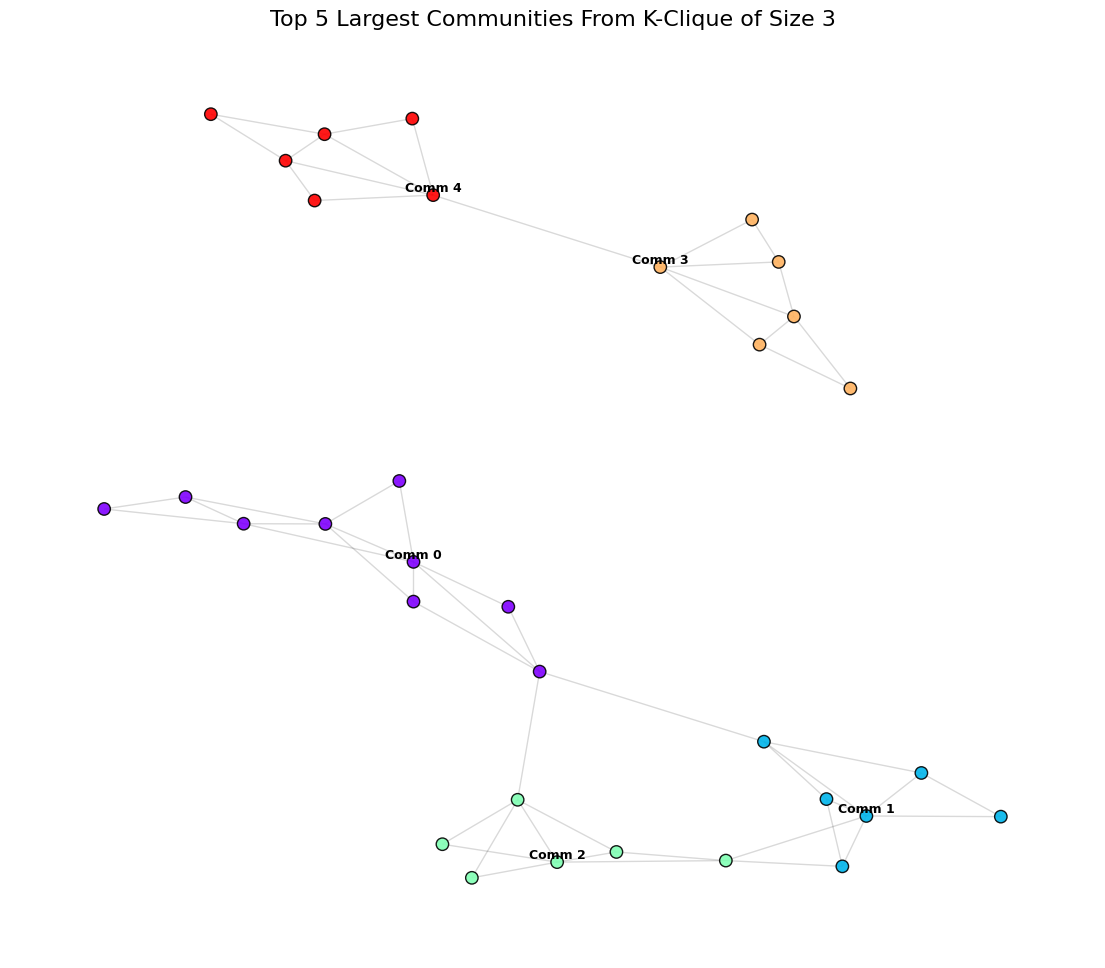

In [40]:
#iterating through the top 5 k-clique communities and labelling all the nodes with their community id
#dictionarity in which the key is the node id and the value is the community id
community_dict_two = {}
#the top_5_nodes list contains all the nodes in the top 5 communities
top_5_nodes_two = []
#for loop iterates through the top 5 communities
for i, community in enumerate(top_5_communities_two):
    #iterates through each node in the community
    for node in community:
        #the node's value is set to the community id in the community dictionary
        community_dict_two[node] = i
        #node id is added to the top 5 nodes list
        top_5_nodes_two.append(node)

#subgraph object which represents the top 5 k-clique (k = 3) communities
G_top5_two = G_sample.subgraph(top_5_nodes_two)

#this list assigns community ids to respective nodes so that each community has a different color
node_colors_two = [community_dict_two[node] for node in G_top5_two.nodes]

#dictionary holding central node id (key) and the community it is central to (value)
central_nodes_two = {}
for comm_id in range(5):
    #list containing all the nodes in the current community
    community_nodes_two = [node for node in top_5_nodes_two if community_dict_two.get(node) == comm_id]
    #dictionary of nodes (keys) and the degree centralities for the nodes (values)
    degree_centrality = nx.degree_centrality(G_top5_two)
    #integer value representing the node id of the central node (highest degree centrality)
    central_node = max(community_nodes_two, key=lambda node: degree_centrality[node])
    #putting the community id label on the most central node
    central_nodes_two[central_node] = comm_id

#creating a new matplotlib figure and spring layout for the top 5 k-clique (k = 3) communities
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G_top5_two, seed=42)

#using the spring layout and the extracted nodes to generate the network x graph
nx.draw_networkx_nodes(G_top5_two, pos, ax=ax, node_color=node_colors_two, cmap=plt.cm.rainbow, node_size=80, alpha=0.9, edgecolors="k")
#drawing edges for nodes in the top 5 k-clique (k=3) communities
nx.draw_networkx_edges(G_top5_two, pos, ax=ax, alpha=0.15)

#dictionary with the central nodes as keys and the community id label as the values
labels_two = {node: f"Comm {comm_id}" for node, comm_id in central_nodes_two.items()}
#draw the labels onto the central nodes for each community
nx.draw_networkx_labels(G_top5_two, pos, labels_two, font_size=9, font_color="black", font_weight="bold", verticalalignment="bottom", ax=ax)

#setting the title to k-clique k = 2 and removing the axes
ax.set_title("Top 5 Largest Communities From K-Clique of Size 3", fontsize=16)
plt.axis("off")
plt.show()

In [41]:
#using the stored k-clique community sizes to compute the average community size - k = 3
#float value containing the average community size for k-clique k = 3
average_community_size_k_clique_3 = sum(community_sizes_two) / len(community_sizes_two)
#printing average community size - k = 3
print(f"Average Community Size (k-Clique, k={k}): {average_community_size_k_clique_3}")

Average Community Size (k-Clique, k=3): 3.344


In [42]:
#printing number of communities in the k-3 partition
print(f"Number of communities with k size of 3: {len(communities_two)}")

Number of communities with k size of 3: 250


In [43]:
#using size of k-cliques as 3+

#k is an integer value specifying the size of the cliques to find -- cliques here are complete graphs with 3 nodes
k = 4
#a list of communities where each community is represented as a frozenset of nodes
communities_three = list(k_clique_communities(G_sample, k))
#a list of all the k=4 k-clique communities sorted in descending order by size of community
sorted_communities_three = sorted(communities_three, key=len, reverse=True)

#finding top 5 largest cliques from k-clique (k=4) by extracting the top 5 nodes in the sorted list
top_5_communities_three = sorted_communities_three[:5]

In [44]:
#printing number of communities in the k-4 partition
print(f"Number of communities with k size of 4: {len(communities_three)}")

Number of communities with k size of 4: 0


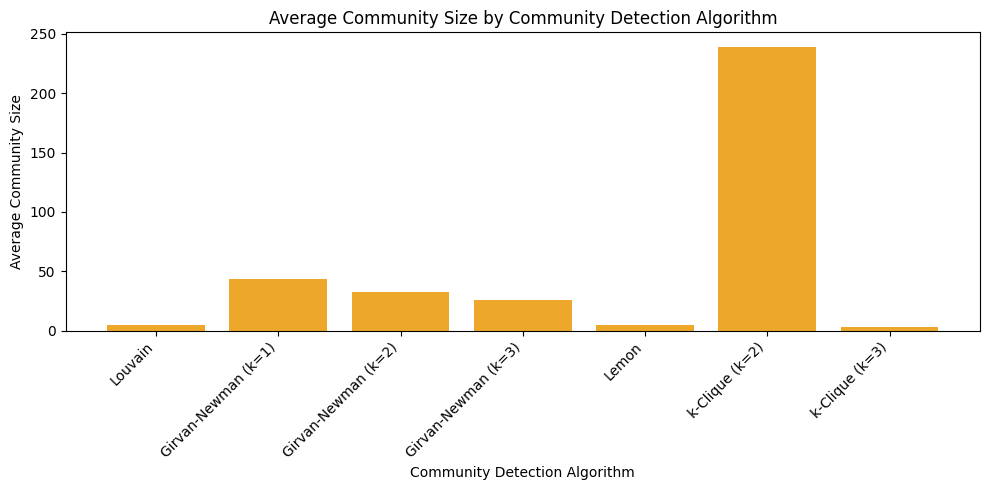

In [45]:
#plotting the average community sizes for all the algorithms against each other on a matplotlib histogram
import matplotlib.pyplot as plt

#a list of all the algorithms which will be used as the x-axis label
algorithms = [
    "Louvain",
    "Girvan-Newman (k=1)",
    "Girvan-Newman (k=2)",
    "Girvan-Newman (k=3)",
    "Lemon",
    "k-Clique (k=2)",
    "k-Clique (k=3)"
]

#a list of all the average community sizes which correspond to the labels in the above list
average_sizes = [
    average_community_size_louvain,
    average_community_sizes_gn_1,
    average_community_sizes_gn_2,
    average_community_sizes_gn_3,
    average_community_size_lemon,
    average_community_size_k_clique_2,
    average_community_size_k_clique_3
]

plt.figure(figsize=(10, 5))
#providing the above lists as the x and y axes of the histogram
plt.bar(algorithms, average_sizes, color="#eda82b")
#setting x, y, and title to relevant messages
plt.xlabel("Community Detection Algorithm")
plt.ylabel("Average Community Size")
plt.title("Average Community Size by Community Detection Algorithm")
#rotating the x labels to avoid overlapping text
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
